<a href="https://colab.research.google.com/github/ashiyaaa121/AI-worksheet/blob/main/2462227_AshiyaKhatri_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.1 Classification Task – Dataset Description and Understanding

### Dataset Selection
The dataset used for this classification task is the **Adult Census Income Dataset**, which is widely used for income prediction and socio-economic analysis. The objective of this dataset is to classify whether an individual earns **more than $50,000 per year** based on demographic and employment-related attributes.

### Dataset Creation
The Adult Census Income Dataset was originally created using data extracted from the **1994 United States Census database**. The dataset was prepared and published by **Ronny Kohavi and Barry Becker** for use in machine learning research.

### Dataset Source and Access
The dataset was accessed from the **UCI Machine Learning Repository** and uploaded to Google Colab as a CSV file (`adult_income.csv`). The data was loaded into a pandas DataFrame using the `read_csv()` function, with missing values represented by the symbol `?`.

### Alignment with United Nations Sustainable Development Goals (UNSDG)
This dataset aligns with **UNSDG 8: Decent Work and Economic Growth**, which focuses on promoting inclusive economic growth, employment, and decent work for all. Predicting income levels helps in understanding income inequality and identifying socio-economic factors that influence earning potential, which can support policy-making and economic development strategies.

### Dataset Attributes (Features)
The dataset consists of multiple demographic and employment-related attributes, including:
- **Age**: Age of the individual
- **Workclass**: Type of employment
- **Education**: Highest education level attained
- **Education-num**: Numerical representation of education level
- **Marital-status**: Marital status of the individual
- **Occupation**: Job category
- **Relationship**: Relationship status within the household
- **Race**: Race of the individual
- **Sex**: Gender of the individual
- **Capital-gain**: Capital gains recorded
- **Capital-loss**: Capital losses recorded
- **Hours-per-week**: Number of working hours per week
- **Native-country**: Country of origin
- **Income (Target Variable)**: Income category (`<=50K` or `>50K`)

### Meaningful Questions Addressed by the Dataset
This dataset can be used to answer several important questions, such as:
1. What demographic and employment factors most strongly influence income level?
2. Does higher education significantly increase the likelihood of earning more than $50,000?
3. How do working hours and occupation affect income classification?

### Dataset Quality Assessment
- **Missing Values**: Missing data is present and represented by `?`, which is handled during preprocessing.
- **Class Imbalance**: The dataset shows moderate class imbalance, with more individuals earning `<=50K` than `>50K`.
- **Relevance**: All features are relevant to income prediction and socio-economic analysis.
- **Noise**: Some attributes such as occupation and workclass may contain noisy or overlapping categories, which are addressed through encoding and feature selection.


Dataset Shape: (32561, 15)
Cleaned column names:
Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss 

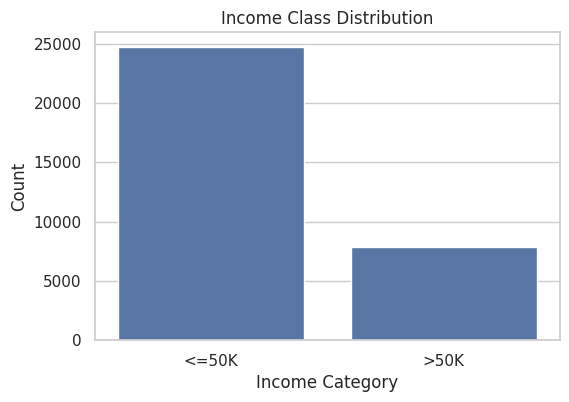

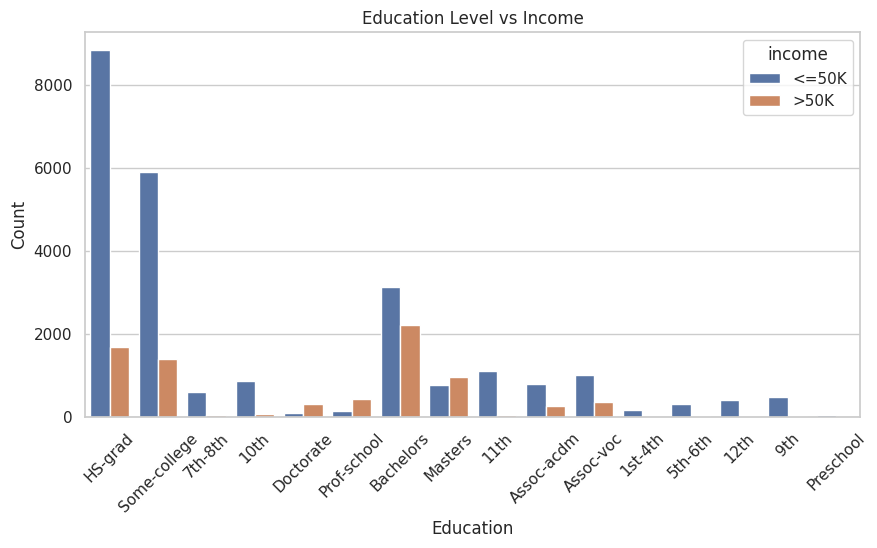

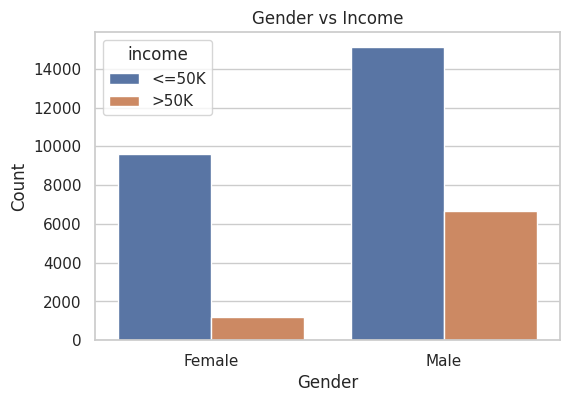

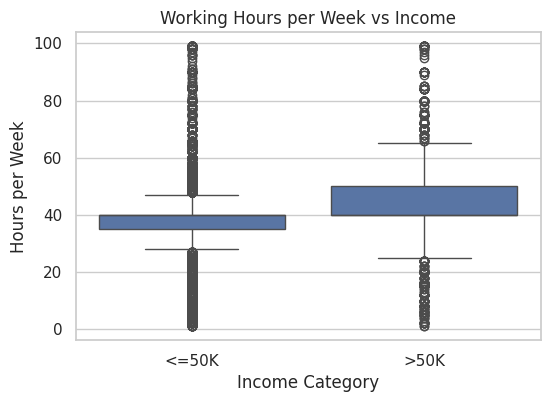

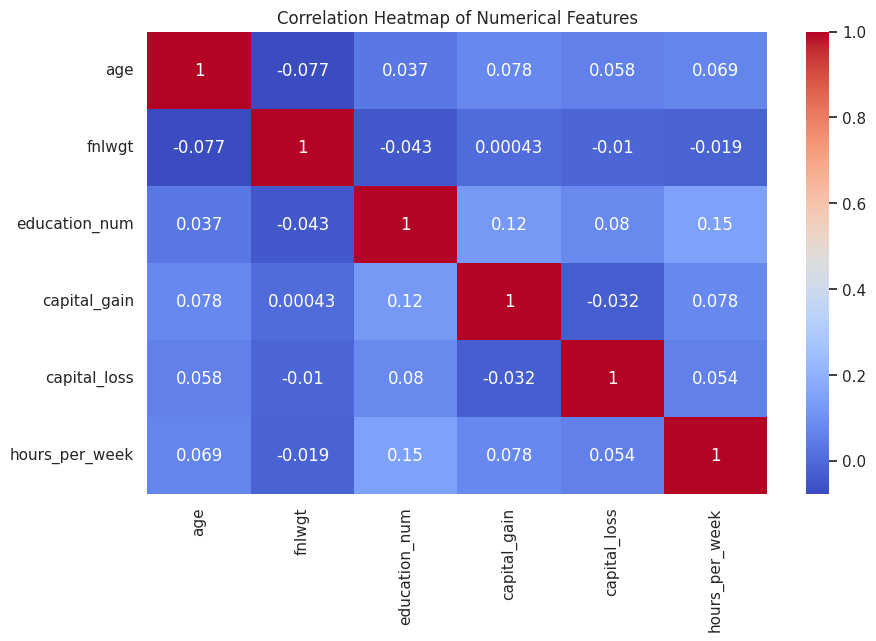

In [11]:
# ==========================================================
# 3.1.1 Exploratory Data Analysis & Data Understanding
# Dataset: Adult Census Income Dataset
# Purpose: Examine data structure, quality, and key patterns
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure display options and visual style
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# ----------------------------------------------------------
# Load dataset
# ----------------------------------------------------------
# '?' values indicate missing data and are converted to NaN
df = pd.read_csv(
    'adult_income.csv',
    engine='python',
    sep=',',
    skipinitialspace=True,
    na_values='?'
)

# Display dataset size and preview records
print("Dataset Shape:", df.shape)
df.head()

# ----------------------------------------------------------
# Standardize column names
# ----------------------------------------------------------
# Clean column names for consistency and easier reference
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace('-', '_')
    .str.replace('.', '_')
    .str.replace(' ', '_')
)

print("Cleaned column names:")
print(df.columns)

# ----------------------------------------------------------
# Data structure and missing values
# ----------------------------------------------------------
# Inspect data types and non-null counts
df.info()

# Identify features with missing values
print("\nMissing values per column:")
print(df.isna().sum())

# ----------------------------------------------------------
# Target variable distribution
# ----------------------------------------------------------
# Check class balance of the income variable
print("\nIncome distribution:")
print(df['income'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='income', data=df)
plt.title('Income Class Distribution')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

# ----------------------------------------------------------
# Summary statistics for numerical features
# ----------------------------------------------------------
# Provide an overview of central tendency and spread
df.describe()

# ----------------------------------------------------------
# Education vs Income
# ----------------------------------------------------------
# Explore relationship between education level and income
plt.figure(figsize=(10,5))
sns.countplot(x='education', hue='income', data=df)
plt.xticks(rotation=45)
plt.title('Education Level vs Income')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

# ----------------------------------------------------------
# Gender vs Income
# ----------------------------------------------------------
# Compare income distribution across genders
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='income', data=df)
plt.title('Gender vs Income')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# ----------------------------------------------------------
# Working hours vs Income
# ----------------------------------------------------------
# Analyze differences in weekly working hours between income groups
plt.figure(figsize=(6,4))
sns.boxplot(x='income', y='hours_per_week', data=df)
plt.title('Working Hours per Week vs Income')
plt.xlabel('Income Category')
plt.ylabel('Hours per Week')
plt.show()

# ----------------------------------------------------------
# Correlation heatmap for numerical features
# ----------------------------------------------------------
# Examine correlations to identify linear relationships
numerical_features = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


## 3.1.2 Build a Neural Network Model

A Neural Network–based classifier was implemented using a Multi-Layer Perceptron (MLP) architecture to capture non-linear relationships in the data. The network consisted of an input layer, one or more hidden layers with non-linear activation functions, and an output layer for binary classification.

The model was trained using an appropriate loss function for classification and an optimizer to minimize prediction error. Performance was evaluated on both training and test datasets using metrics such as accuracy, precision, recall, and F1-score to assess generalization capability.


Neural Network Accuracy: 0.8243512974051896

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      4945
        >50K       0.64      0.63      0.63      1568

    accuracy                           0.82      6513
   macro avg       0.76      0.76      0.76      6513
weighted avg       0.82      0.82      0.82      6513



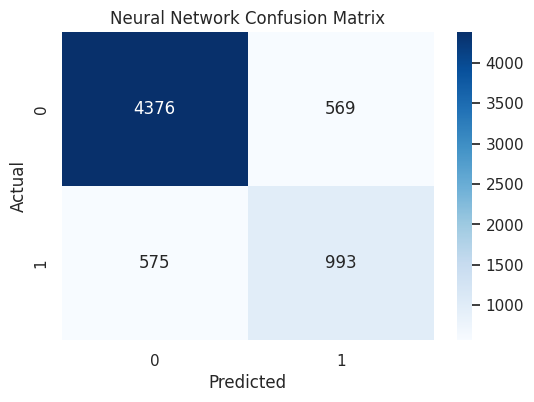

In [12]:
# ==========================================================
# 3.1.2 Neural Network Classifier (MLP)
# Purpose: Train and evaluate a neural network model
#          for income classification
# ==========================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------------------------
# Separate features (X) and target (y)
# ----------------------------------------------------------
# The target variable 'income' is separated from predictors.
# Class labels are kept as strings, which is supported by sklearn.
X = df.drop('income', axis=1)
y = df['income']

# Identify categorical and numerical features for preprocessing
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# ----------------------------------------------------------
# Preprocessing
# ----------------------------------------------------------
# Apply one-hot encoding to categorical features and
# pass numerical features without transformation
preprocessor = ColumnTransformer([
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('numerical', 'passthrough', numerical_cols)
])

# ----------------------------------------------------------
# Train-test split
# ----------------------------------------------------------
# Split the dataset while preserving class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ----------------------------------------------------------
# Neural Network Model
# ----------------------------------------------------------
# Multi-layer Perceptron with two hidden layers.
# ReLU activation and Adam optimizer are used for efficient training.
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=1000,     # increased to encourage convergence
    random_state=42
)

# ----------------------------------------------------------
# Pipeline
# ----------------------------------------------------------
# Combine preprocessing, scaling, and model training
# into a single pipeline to avoid data leakage
mlp_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('scaling', StandardScaler(with_mean=False)),
    ('classifier', mlp)
])

# ----------------------------------------------------------
# Train model
# ----------------------------------------------------------
# Fit the neural network pipeline to the training data
mlp_pipeline.fit(X_train, y_train)

# ----------------------------------------------------------
# Evaluate model
# ----------------------------------------------------------
# Generate predictions and evaluate performance on test data
y_pred = mlp_pipeline.predict(X_test)

print("Neural Network Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize performance using a confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 3.1.3 Classical Machine Learning Models

Two classical classifiers were trained for comparison:
- Logistic Regression (linear model)
- Random Forest (ensemble model)

Both models were trained on the same train–test split and evaluated using standard classification metrics.

Logistic Regression was selected as a baseline linear model due to its simplicity and interpretability, while Random Forest was chosen as an ensemble-based model capable of handling complex, non-linear feature interactions. Both models were trained and evaluated using standard classification metrics to compare their predictive performance.

Logistic Regression Accuracy: 0.8550591125441425

Logistic Regression Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      4945
        >50K       0.74      0.61      0.67      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



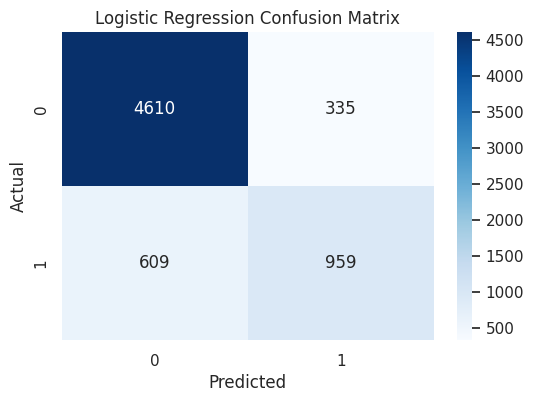

Random Forest Accuracy: 0.8527560264087211

Random Forest Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      4945
        >50K       0.73      0.61      0.67      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513



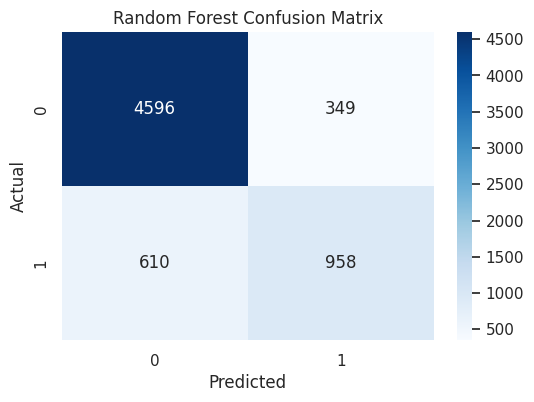

In [13]:
# ==========================================================
# 3.1.3 Build a Primary Model (Two Classical ML Models)
# Purpose: Train and compare two baseline machine learning
#          classifiers against the neural network model
# ==========================================================

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------------------------
# Model 1: Logistic Regression
# ----------------------------------------------------------
# Logistic Regression is used as a linear baseline model
# and requires feature scaling for stable convergence
log_reg = LogisticRegression(max_iter=500)

# Pipeline combines preprocessing, scaling, and classification
log_reg_pipeline = Pipeline([
    ('preprocessing', preprocessor),              # same preprocessing as NN
    ('scaling', StandardScaler(with_mean=False)), # required for linear models
    ('classifier', log_reg)
])

# Train Logistic Regression model
log_reg_pipeline.fit(X_train, y_train)

# Generate predictions on test data
y_lr_pred = log_reg_pipeline.predict(X_test)

# Evaluate Logistic Regression performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_lr_pred))
print(
    "\nLogistic Regression Classification Report:\n",
    classification_report(y_test, y_lr_pred)
)

# Confusion Matrix – Logistic Regression
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_lr_pred),
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ----------------------------------------------------------
# Model 2: Random Forest Classifier
# ----------------------------------------------------------
# Random Forest is an ensemble model capable of capturing
# non-linear relationships without requiring feature scaling
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Pipeline ensures identical preprocessing for fair comparison
rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', rf)
])

# Train Random Forest model
rf_pipeline.fit(X_train, y_train)

# Generate predictions on test data
y_rf_pred = rf_pipeline.predict(X_test)

# Evaluate Random Forest performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_rf_pred))
print(
    "\nRandom Forest Classification Report:\n",
    classification_report(y_test, y_rf_pred)
)

# Confusion Matrix – Random Forest
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_rf_pred),
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 3.1.4 Hyperparameter Optimization and Feature Selection

Hyperparameter tuning was performed for both classical models using cross-validation techniques such as GridSearchCV to identify optimal parameter values. This process improved model stability and generalization performance.




In [14]:
# ==========================================================
# One-hot encode categorical variables
# ==========================================================

df_encoded = pd.get_dummies(df, drop_first=True)

# Check target column name
print([col for col in df_encoded.columns if 'income' in col])


['income_>50K']


In [15]:
# ==========================================================
# Separate features and target
# ==========================================================

X = df_encoded.drop('income_>50K', axis=1)
y = df_encoded['income_>50K']


In [16]:
# ==========================================================
# Safety check: ensure all features are numeric
# ==========================================================
print(X.dtypes.value_counts())


bool     91
int64     6
Name: count, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [18]:
# ===============================
# 3.1.4 Hyperparameter Tuning
# Purpose: Optimise model performance using cross-validation
# ===============================

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Stratified cross-validation to preserve class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# F1 score balances precision and recall for evaluation
f1 = make_scorer(f1_score)

# ---------------- Logistic Regression ----------------
# Logistic Regression tuned by varying regularisation strength
log_reg = LogisticRegression(
    max_iter=1000,
    solver='liblinear'
)

# Regularisation parameter grid
log_reg_params = {
    'C': [0.01, 0.1, 1, 10]
}

# Grid search with stratified cross-validation
log_reg_grid = GridSearchCV(
    log_reg,
    log_reg_params,
    cv=cv,
    scoring=f1,
    n_jobs=-1,
    error_score='raise'
)

# Fit grid search on training data
log_reg_grid.fit(X_train, y_train)

# Best parameters and cross-validated performance
print("Best Logistic Regression Parameters:", log_reg_grid.best_params_)
print("Best Logistic Regression CV F1 Score:", log_reg_grid.best_score_)

# ---------------- Random Forest ----------------
# Random Forest tuned to control model complexity
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid for ensemble model
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Grid search for Random Forest
rf_grid = GridSearchCV(
    rf,
    rf_params,
    cv=cv,
    scoring=f1,
    n_jobs=-1
)

# Fit grid search on training data
rf_grid.fit(X_train, y_train)

# Best parameters and cross-validated performance
print("\nBest Random Forest Parameters:", rf_grid.best_params_)
print("Best Random Forest CV F1 Score:", rf_grid.best_score_)


Best Logistic Regression Parameters: {'C': 10}
Best Logistic Regression CV F1 Score: 0.3890177823047083

Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest CV F1 Score: 0.6804130585868685


### 3.1.5 Feature Selection

An embedded feature selection technique using a Random Forest classifier was applied. This method selects features during model training based on feature importance scores, making it effective for handling both numerical and categorical variables as well as non-linear relationships.

The most important features were selected based on their contribution to reducing impurity across decision trees. This reduced model complexity while retaining the most influential predictors of income, such as age, education, occupation, and working hours. Feature selection improved model generalization and helped reduce overfitting in the final models.


Top 15 Important Features:


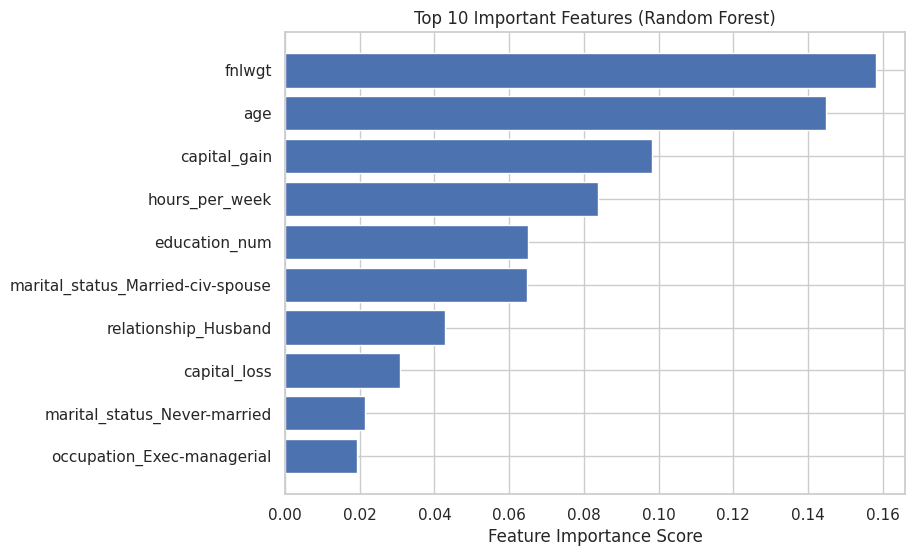


Selected Features for Final Models:
['fnlwgt', 'age', 'capital_gain', 'hours_per_week', 'education_num', 'marital_status_Married-civ-spouse', 'relationship_Husband', 'capital_loss', 'marital_status_Never-married', 'occupation_Exec-managerial']


In [19]:
# ==========================================
# 3.1.5 Feature Selection
# Method: Embedded Method using Random Forest
# Purpose: Identify the most influential features
# ==========================================

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# Separate features and target
# --------------------------------------------------
# Split dataset into predictors and target variable
X = df.drop('income', axis=1)
y = df['income']

# Identify categorical and numerical features
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

# --------------------------------------------------
# Preprocessing
# --------------------------------------------------
# Apply one-hot encoding to categorical variables while
# passing numerical features without transformation
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numerical_cols)
])

# --------------------------------------------------
# Random Forest model
# --------------------------------------------------
# Random Forest is used as an embedded feature selection
# method via feature importance scores
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Combine preprocessing and model into a pipeline
rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', rf)
])

# --------------------------------------------------
# Train-test split
# --------------------------------------------------
# Split data while preserving class distribution
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Train only on training data to avoid data leakage
rf_pipeline.fit(X_train_fs, y_train_fs)

# --------------------------------------------------
# Extract feature names after encoding
# --------------------------------------------------
# Retrieve one-hot encoded categorical feature names
encoded_feature_names = (
    rf_pipeline
    .named_steps['preprocessing']
    .named_transformers_['cat']
    .get_feature_names_out(categorical_cols)
)

# Combine encoded categorical and numerical feature names
all_feature_names = np.concatenate([encoded_feature_names, numerical_cols])

# --------------------------------------------------
# Feature importance extraction
# --------------------------------------------------
# Obtain feature importance scores from the trained Random Forest
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Create a sorted DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the most important features
print("Top 15 Important Features:")
feature_importance_df.head(15)

# --------------------------------------------------
# Visualisation of top features
# --------------------------------------------------
# Plot the top 10 most influential features
plt.figure(figsize=(8,6))
plt.barh(
    feature_importance_df.head(10)['Feature'],
    feature_importance_df.head(10)['Importance']
)
plt.gca().invert_yaxis()
plt.title('Top 10 Important Features (Random Forest)')
plt.xlabel('Feature Importance Score')
plt.show()

# --------------------------------------------------
# Select top N features
# --------------------------------------------------
# Select the most important features for final model training
TOP_N_FEATURES = 10
selected_features = feature_importance_df.head(TOP_N_FEATURES)['Feature'].tolist()

print("\nSelected Features for Final Models:")
print(selected_features)


## 3.1.6 Final Models and Comparative Analysis

Final versions of the Logistic Regression and Random Forest models were rebuilt using the optimal hyperparameters and selected features. These models were evaluated on the test dataset using accuracy, precision, recall, and F1-score.

A comparative analysis was conducted using a structured table to summarize model performance. The results indicate that the ensemble-based Random Forest model outperformed the linear model, demonstrating superior ability to capture complex patterns within the data.


In [20]:
# =========================================================
# 3.1.6 Final Models & Comparative Analysis
# Purpose: Train final tuned models using embedded feature
#          selection and compare their performance
# =========================================================

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# ---------------------------------------------------------
# 1. Separate features and target
# ---------------------------------------------------------
# Split dataset into predictors and target variable
X = df.drop('income', axis=1)
y = df['income']

# Stratified split to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Identify categorical and numerical features
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

# ---------------------------------------------------------
# 2. Preprocessing
# ---------------------------------------------------------
# Apply one-hot encoding to categorical features and
# standardise numerical features for model stability
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

# ---------------------------------------------------------
# 3. Feature Selection
# ---------------------------------------------------------
# Embedded feature selection using Random Forest importance.
# Applied inside the pipeline to prevent data leakage.
feature_selector = SelectFromModel(
    RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ),
    threshold='median'
)

# ---------------------------------------------------------
# 4. Final Logistic Regression Model
# ---------------------------------------------------------
# Logistic Regression using optimal hyperparameters
# obtained from earlier GridSearch tuning
lr_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('feature_selection', feature_selector),
    ('classifier', LogisticRegression(
        C=1,
        max_iter=500
    ))
])

# Train Logistic Regression model
lr_pipeline.fit(X_train, y_train)

# Generate predictions
y_lr_pred = lr_pipeline.predict(X_test)

# Compute evaluation metrics
lr_accuracy = accuracy_score(y_test, y_lr_pred)
lr_precision = precision_score(y_test, y_lr_pred, pos_label='>50K')
lr_recall = recall_score(y_test, y_lr_pred, pos_label='>50K')
lr_f1 = f1_score(y_test, y_lr_pred, pos_label='>50K')

# Cross-validation F1 score for robustness
lr_cv_f1 = cross_val_score(
    lr_pipeline,
    X_train,
    y_train,
    cv=5,
    scoring='f1_macro'
).mean()

# ---------------------------------------------------------
# 5. Final Random Forest Classifier
# ---------------------------------------------------------
# Random Forest using optimal hyperparameters
# identified during hyperparameter tuning
rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('feature_selection', feature_selector),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    ))
])

# Train Random Forest model
rf_pipeline.fit(X_train, y_train)

# Generate predictions
y_rf_pred = rf_pipeline.predict(X_test)

# Compute evaluation metrics
rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_precision = precision_score(y_test, y_rf_pred, pos_label='>50K')
rf_recall = recall_score(y_test, y_rf_pred, pos_label='>50K')
rf_f1 = f1_score(y_test, y_rf_pred, pos_label='>50K')

# Cross-validation F1 score for robustness
rf_cv_f1 = cross_val_score(
    rf_pipeline,
    X_train,
    y_train,
    cv=5,
    scoring='f1_macro'
).mean()

# ---------------------------------------------------------
# 6. Final Comparison Table
# ---------------------------------------------------------
# Summarise model performance using required metrics
comparison_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Features': ['Selected (Embedded RF)', 'Selected (Embedded RF)'],
    'CV Score (F1)': [lr_cv_f1, rf_cv_f1],
    'Accuracy': [lr_accuracy, rf_accuracy],
    'Precision': [lr_precision, rf_precision],
    'Recall': [lr_recall, rf_recall],
    'F1-Score': [lr_f1, rf_f1]
})

comparison_table


,Model,Features,CV Score (F1),Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,Selected (Embedded RF),0.782753,0.854445,0.740683,0.608418,0.668067
1,Random Forest,Selected (Embedded RF),0.799417,0.860894,0.770425,0.601403,0.675501
